# oob 和更多的 Bagging 相关

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


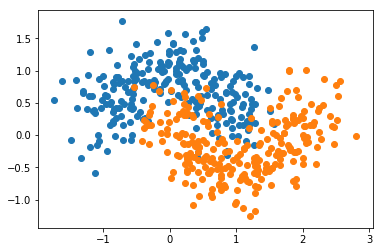

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## oob

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    oob_score=True
)
bagging_clf.fit(X, y)

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [5]:
bagging_clf.oob_score_

0.916

## n_jobs

In [6]:
%%time
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    oob_score=True
)

bagging_clf.fit(X, y)

CPU times: user 718 ms, sys: 15.5 ms, total: 734 ms
Wall time: 752 ms


In [7]:
%%time
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1
)

bagging_clf.fit(X, y)

CPU times: user 163 ms, sys: 39.2 ms, total: 202 ms
Wall time: 470 ms


## bootstrap_features

In [8]:
random_subspaces_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=500,
    bootstrap=True,
    oob_score=True,
    max_features=1,
    bootstrap_features=True
)

random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.806

In [9]:
random_patches_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    oob_score=True,
    max_features=1,
    bootstrap_features=True
)

random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.86